In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
tf.keras.utils.set_random_seed(123)

Mounted at /content/drive


In [2]:
trainDF = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/UCI_Sentiment_Analysis/gloveEmbedding_train.parquet")

testDF = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/UCI_Sentiment_Analysis/gloveEmbedding_test.parquet")

In [3]:
# Positve
trainDF[ trainDF["sentiment"] == 1 ].head(5)

,id,rating,sentiment,wordEmbedding
0,1175,9,1,"[0.013433628, 0.008061813, 0.19747755, -0.3195..."
1,4383,9,1,"[-0.017688854, 0.17036815, 0.28469002, -0.2339..."
2,10044,9,1,"[-0.03156714, 0.18471205, 0.22300884, -0.15945..."
3,4076,10,1,"[-0.07171856, 0.20415959, 0.289257, -0.1868104..."
4,2662,10,1,"[-0.025108574, 0.15275864, 0.22979191, -0.1917..."


In [4]:
# Negative
trainDF[ trainDF["sentiment"] == 0 ].head(5)

,id,rating,sentiment,wordEmbedding
5,1930,4,0,"[-0.08480997, 0.23871018, 0.26606047, -0.17039..."
6,1929,4,0,"[-0.0904777, 0.2393774, 0.27164343, -0.1729672..."
9,7726,1,0,"[-0.03266518, 0.15753976, 0.29961297, -0.26573..."
10,2981,1,0,"[-0.04853995, 0.23368208, 0.29547942, -0.26390..."
11,1048,4,0,"[0.029550904, 0.20431304, 0.25805327, -0.21469..."


In [5]:
X_train = np.stack(trainDF['wordEmbedding'].to_numpy())
Y_train = trainDF["sentiment"].to_numpy()

X_test = np.stack(testDF['wordEmbedding'].to_numpy())
Y_test = testDF["sentiment"].to_numpy()

x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.1, random_state = 123)

In [6]:
# GloVe & Word2Vec
print("GloVe: {}".format(X_train.shape) )
print(X_train)

GloVe: (25000, 100)
[[ 0.01343363  0.00806181  0.19747755 ...  0.02840807  0.32913905
   0.0634177 ]
 [-0.01768885  0.17036815  0.28469002 ... -0.2994456   0.18551742
   0.15101801]
 [-0.03156714  0.18471205  0.22300884 ... -0.18936291  0.28109896
   0.06738407]
 ...
 [-0.01836912 -0.0339475   0.21474963 ... -0.38558358  0.23575287
   0.13823874]
 [ 0.00851601  0.34631148  0.1887047  ...  0.25152472  0.48830858
  -0.07344001]
 [ 0.06613751  0.22457284  0.44665167 ... -0.32943818  0.3227977
   0.29882333]]


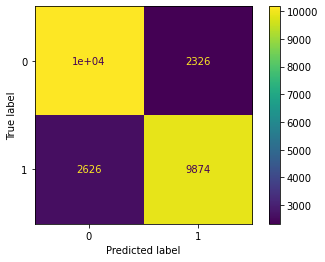

In [7]:
model_svm = SVC().fit(x_train, y_train)

y_predict = model_svm.predict(X_test)

matrix = confusion_matrix(Y_test, y_predict)

ConfusionMatrixDisplay(matrix).plot()

              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80     12500
    Positive       0.81      0.79      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



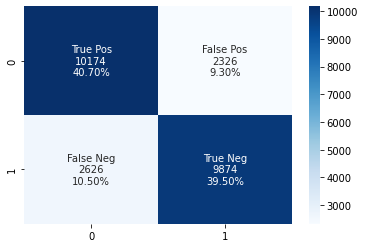

In [8]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

print( classification_report(Y_test, y_predict, target_names=['Negative', 'Positive']) )

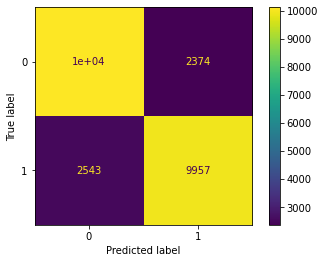

In [9]:
model_lg = LogisticRegression(solver="liblinear").fit(x_train, y_train)

y_predict = model_lg.predict(X_test)

matrix = confusion_matrix(Y_test, y_predict)

ConfusionMatrixDisplay(matrix).plot()

              precision    recall  f1-score   support

    Negative       0.80      0.81      0.80     12500
    Positive       0.81      0.80      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



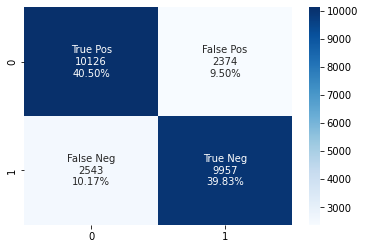

In [10]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

print( classification_report(Y_test, y_predict, target_names=['Negative', 'Positive']) )